## 밑바닥부터 시작하는 딥러닝(Deep Learning from Scratch) 챕터별 예제코드 정리 
예제코드가 기본이나 정확히 일치하지는 않습니다. 개인적으로 모든 코드들을 문서화하되 너무 기본적인 내용은 제외하거나 나름대로 더 필요하다고 생각되는 내용은 추가하였습니다. 같은 내용을 다른 방식으로 구현하는 경우도 있습니다.
## Chapter 6. 학습 관련 기술들
### 6.2 Weight initialization
아래의 링크에서 좀 더 상세한 내용을 확인이 가능하니 참고할 것  
http://cs231n.github.io/neural-networks-2/#init

### Distribution of hidden node (sigmoid activation function)
### first example
아래와 같이 weight initialization을 하면 hidden node의 값이 0에서 1로 치우쳐져있어 Back-propagation 과정에서 gradient vanishing 문제가 발생한다. 
  
$$weight \sim N(0,1) $$

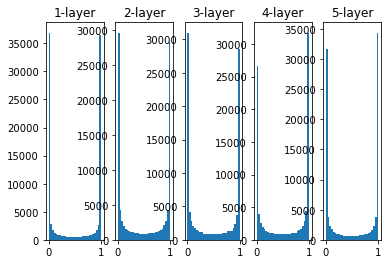

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
## Distribution of hidden node (sigmoid activation function)
# first example : weight initialization ~ N(0,1)
# 뉴런의 값이 0에서 1로 치우쳐져있어 vanishing gradient 문제가 발생한다.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.random.randn(1000, 100)
activations = {}
node_num = 100
hidden_layer_size = 5

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

### second example
아래와 같이 weight initialization을 하면 hidden node의 값에 중앙에 치우쳐있어 gradient vanishing 문제가 발생하지않으나 neuralnet 자체의 capacity가 줄어든다. 왜냐하면 결국 다양성을 갖추기위해 hidden layer내에 hidden node를 많도록 설정하였는데 전부 같은 값을 출력으로 내뱉고 있기 때문이다.
  
$$weight \sim N(0, 0.01) $$

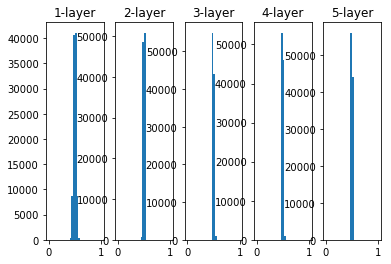

In [2]:
x = np.random.randn(1000, 100)
activations = {}
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

### Xavier initialization 
아래와 같은 weight initialization을 Xavier initialization이라고 하며 hidden node의 값이 다양하게 분포함을 확인할 수 있다. 따라서 capacity의 문제와 gradient vanishing 문제를 해결할 수 있다. 아래의 식은 단순화된 형태로 previous layer의 node의 수만 고려한 형태이며 논문에서는 next layer의 node의 수도 같이 고려하는 형태를 제안한다. Xavier initialization의 경우 tanh, sigmoid와 같이 좌우대칭이라 중앙 부근이 선형적인 구조 일 때 활용한다.  
논문 : http://www.jmlr.org/proceedings/papers/v9/glorot10a/glorot10a.pdf?hc_location=ufi
  
$$weight \sim N(0,\sqrt{1 \over n_{in}})$$

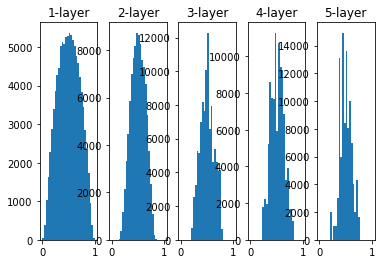

In [3]:
x = np.random.randn(1000, 100)
activations = {}
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) * np.sqrt(1 / node_num)
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

### Distribution of hidden node (Recified linear unit)
### first example
Relu를 고려해봤을 때, 아래의 그림과 같은 hidden node 값의 histogram은 gradient vanishing을 유발한다. 깊은 layer에서 gradient가 값이 대부분 0이 되어 전파되지 않을 것이다.
$$weight \sim N(0,0.01) $$

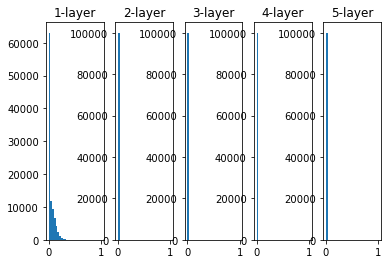

In [4]:
def Relu(x):
    return np.maximum(x,0)
# first example : weight initialization ~ N(0,0.01)
x = np.random.randn(1000, 100)
activations = {}
node_num = 100
hidden_layer_size = 5


for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x, w)
    z = Relu(a)
    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

### Xavier initialization
위의 경우 보다는 낫지만 여전히 깊은 layer에서는 많은 gradient들이 vanishing 하게된다.  

$$weight \sim N(0,\sqrt{1 \over n_{in}})$$

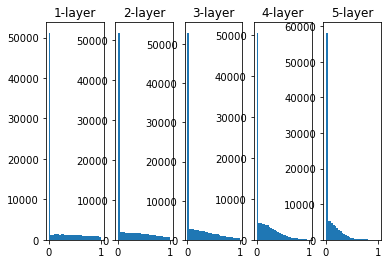

In [5]:
# second example : Xavier initialization
x = np.random.randn(1000, 100)
activations = {}
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num)  * np.sqrt(1 / node_num)
    a = np.dot(x, w)
    z = Relu(a)
    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

### He initialization
Actication function을 Relu를 쓰는 경우 Xavier initialization 보다 He initialization이 더 적합하다. 자세한 해석을 논문을 참고.  
논문 : http://www.cv-foundation.org/openaccess/content_iccv_2015/papers/He_Delving_Deep_into_ICCV_2015_paper.pdf  
  
$$weight \sim N(0,\sqrt{2 \over n_{in}})$$

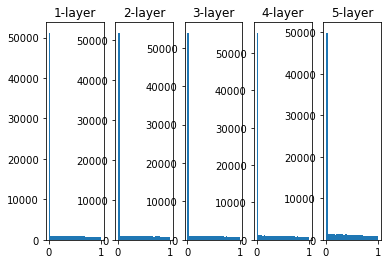

In [6]:
x = np.random.randn(1000, 100)
activations = {}
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num)  * ( np.sqrt(2 / node_num))
    a = np.dot(x, w)
    z = Relu(a)
    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()